In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

In [2]:
#Challenge 1: load in some MTA turnstile data
def get_MTA_Data(weeks):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week in weeks:
        file_url = url.format(week)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

turnstiles_df = get_MTA_Data([180825, 180901, 180908])
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,00:00:00,REGULAR,6728354,2280604
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,04:00:00,REGULAR,6728373,2280609
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,08:00:00,REGULAR,6728388,2280634
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,12:00:00,REGULAR,6728469,2280669
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,16:00:00,REGULAR,6728665,2280681


In [3]:
turnstiles_df.shape

(590662, 11)

In [4]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [5]:
turnstiles_df.columns = [col.strip() for col in turnstiles_df.columns]

In [6]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
#Challenge 2: create a datetime column, combining date and time
from datetime import datetime

In [8]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df["DATE"] + " " + turnstiles_df["TIME"])

In [9]:
turnstiles_df.shape

(590662, 12)

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,00:00:00,REGULAR,6728354,2280604,2018-08-18 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,04:00:00,REGULAR,6728373,2280609,2018-08-18 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,08:00:00,REGULAR,6728388,2280634,2018-08-18 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,12:00:00,REGULAR,6728469,2280669,2018-08-18 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2018,16:00:00,REGULAR,6728665,2280681,2018-08-18 16:00:00


In [11]:
turnstiles_df.DATE.value_counts().sort_index()

08/18/2018    27785
08/19/2018    27921
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
08/25/2018    27767
08/26/2018    28081
08/27/2018    28254
08/28/2018    28772
08/29/2018    28203
08/30/2018    28447
08/31/2018    28101
09/01/2018    27816
09/02/2018    27850
09/03/2018    27884
09/04/2018    28021
09/05/2018    27966
09/06/2018    28057
09/07/2018    28063
Name: DATE, dtype: int64

In [12]:
#check that C/A, Unit, SCP, Station, and Date-time are unique identifiers
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-08-18 00:00:00,1
393967,R147,R033,04-00-01,TIMES SQ-42 ST,2018-08-21 04:00:00,1
393771,R145,R032,00-06-02,TIMES SQ-42 ST,2018-08-30 12:00:00,1
393772,R145,R032,00-06-02,TIMES SQ-42 ST,2018-08-30 16:00:00,1
393773,R145,R032,00-06-02,TIMES SQ-42 ST,2018-08-30 20:00:00,1


In [13]:
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)

In [14]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [15]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [16]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,08/18/2018,6728870,NaN,NaN
1,A002,R051,02-00-00,59 ST,08/19/2018,6729424,08/18/2018,6728870.0
2,A002,R051,02-00-00,59 ST,08/20/2018,6730628,08/19/2018,6729424.0
3,A002,R051,02-00-00,59 ST,08/21/2018,6731912,08/20/2018,6730628.0
4,A002,R051,02-00-00,59 ST,08/22/2018,6733269,08/21/2018,6731912.0


In [17]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [18]:
turnstiles_daily[turnstiles_daily["ENTRIES"]<turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
478,A007,R079,01-06-00,5 AV/59 ST,09/03/2018,458795,09/02/2018,3408571.0
715,A011,R080,01-00-00,57 ST-7 AV,08/19/2018,885886042,08/18/2018,885886284.0
716,A011,R080,01-00-00,57 ST-7 AV,08/20/2018,885885611,08/19/2018,885886042.0
717,A011,R080,01-00-00,57 ST-7 AV,08/21/2018,885885092,08/20/2018,885885611.0
718,A011,R080,01-00-00,57 ST-7 AV,08/22/2018,885884601,08/21/2018,885885092.0


In [19]:
#check for rows where previous entries > current entries while getting the daily entries
def get_daily_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter <0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"],row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_entries, axis=1, max_counter = 1000000)

458795 3408571.0
1217 1813660.0
174 3955974.0
557 15071166.0
617 5212062.0
543 1684542.0
44508290 1493042101.0
0 5877814.0
0 50331648.0
1083342 2436.0
3697 1086248.0
1089275 3697.0
5167 1096618.0
1102241 5167.0
6690 1109047.0
1115012 6690.0
2093 1042359.0
1535 4236824.0
710 704675856.0
134 4274215.0
4 2062183.0
318816013 1283734.0
2919 7099999.0
870 6525408.0


In [21]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,08/19/2018,6729424,08/18/2018,6728870.0,554.0
2,A002,R051,02-00-00,59 ST,08/20/2018,6730628,08/19/2018,6729424.0,1204.0
3,A002,R051,02-00-00,59 ST,08/21/2018,6731912,08/20/2018,6730628.0,1284.0
4,A002,R051,02-00-00,59 ST,08/22/2018,6733269,08/21/2018,6731912.0,1357.0
5,A002,R051,02-00-00,59 ST,08/23/2018,6734585,08/22/2018,6733269.0,1316.0


In [22]:
#Challenge # 4: plot the daily time series for a turnstile
%matplotlib inline
import matplotlib.pyplot as plt

turnstiles_daily[turnstiles_daily.STATION=="77 ST"].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
11759,C024,R214,00-00-00,77 ST,08/19/2018,8004432,08/18/2018,8003783.0,649.0
11760,C024,R214,00-00-00,77 ST,08/20/2018,8006149,08/19/2018,8004432.0,1717.0
11761,C024,R214,00-00-00,77 ST,08/21/2018,8007989,08/20/2018,8006149.0,1840.0
11762,C024,R214,00-00-00,77 ST,08/22/2018,8009885,08/21/2018,8007989.0,1896.0
11763,C024,R214,00-00-00,77 ST,08/23/2018,8011753,08/22/2018,8009885.0,1868.0


In [29]:
mask = ((turnstiles_daily["C/A"] == "C024") & \
(turnstiles_daily["UNIT"] == "R214") & \
(turnstiles_daily["SCP"] == "00-00-00"))
data_77th_St = turnstiles_daily[mask]

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


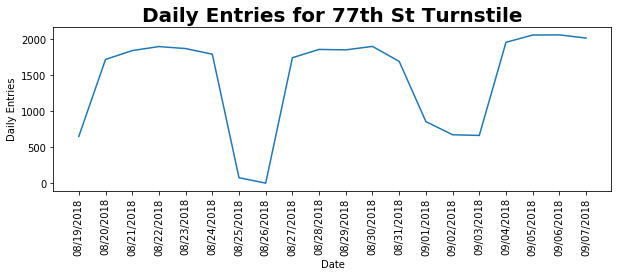

In [58]:
x = data_77th_St["DATE"]
y = data_77th_St["DAILY_ENTRIES"]
plt.figure(figsize=(10,3))
plt.plot(x,y)
plt.title("Daily Entries for 77th St Turnstile", family="Helvetica",weight="bold",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Daily Entries")
plt.xticks(x, rotation=90);

In [107]:
# #Challenge #5 - C/A, Unit, Station dataframe

control_Area_Wide = turnstiles_daily.groupby(["C/A","UNIT","STATION","DATE"])["DAILY_ENTRIES"].sum()

control_Area_Wide

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          08/19/2018     6527.0
                            08/20/2018    11190.0
                            08/21/2018    12361.0
                            08/22/2018    12590.0
                            08/23/2018    12662.0
                            08/24/2018    12162.0
                            08/25/2018     7627.0
                            08/26/2018     6002.0
                            08/27/2018    11262.0
                            08/28/2018    12083.0
                            08/29/2018    12277.0
                            08/30/2018    12414.0
                            08/31/2018    11917.0
                            09/01/2018     7936.0
                            09/02/2018     6353.0
                            09/03/2018     5988.0
                            09/04/2018    11313.0
                            09/05/2018    12635.0
                            09/06/2018    12839.0
           

In [30]:
#Challenge#6 Station-wide aggregate by date
station_Wide = turnstiles_daily.groupby(["STATION","DATE"])["DAILY_ENTRIES"].sum().reset_index()

station_Wide

,STATION,DATE,DAILY_ENTRIES
0,1 AV,08/19/2018,10963.0
1,1 AV,08/20/2018,16317.0
2,1 AV,08/21/2018,17812.0
3,1 AV,08/22/2018,18672.0
4,1 AV,08/23/2018,18809.0
5,1 AV,08/24/2018,19154.0
6,1 AV,08/25/2018,15510.0
7,1 AV,08/26/2018,13094.0
8,1 AV,08/27/2018,16700.0
9,1 AV,08/28/2018,17693.0


Text(0,0.5,'Daily Entries')

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


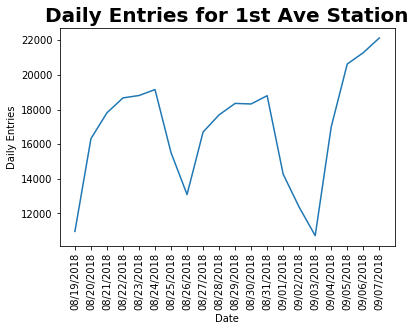

In [38]:
#Challenge#7 - plot the time series for a station
first_Av_Daily = station_Wide[station_Wide["STATION"]=="1 AV"]
x = first_Av_Daily["DATE"]
y = first_Av_Daily["DAILY_ENTRIES"]
plt.plot(x,y)
plt.xticks(x, rotation=90)
plt.title("Daily Entries for 1st Ave Station", family="Helvetica",weight="bold",fontsize=20)
plt.xlabel("Date")
plt.ylabel("Daily Entries")

In [43]:
#Challenge #8 - weekly plots for one station
first_Av_Week1 = first_Av_Daily.iloc[0:7]
first_Av_Week2 = first_Av_Daily.iloc[7:14]
first_Av_Week3 = first_Av_Daily.iloc[14:]


Text(0,0.5,'Daily Entries')

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


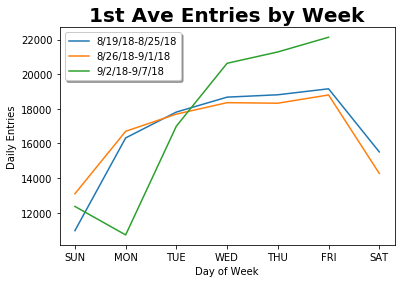

In [56]:
y1 = first_Av_Week1["DAILY_ENTRIES"]
y2 = first_Av_Week2["DAILY_ENTRIES"]
y3 = first_Av_Week3["DAILY_ENTRIES"]
x1 = range(len(y1))
x2 = range(len(y2))
x3 = range(len(y3))

plt.plot(x1,y1, label="8/19/18-8/25/18")
plt.plot(x1,y2)
plt.plot(x3,y3)


weekdays = ["SUN", "MON", "TUE", "WED", "THU", "FRI", "SAT"]
plt.xticks(x1, weekdays)
plt.legend(['8/19/18-8/25/18','8/26/18-9/1/18', '9/2/18-9/7/18'],shadow = True, loc = 0);
plt.title("1st Ave Entries by Week", family="Helvetica",weight="bold",fontsize=20)
plt.xlabel("Day of Week")
plt.ylabel("Daily Entries")

In [49]:
#Challenge #9 - total ridership sorted

total_Ridership = turnstiles_daily.groupby(["STATION"])["DAILY_ENTRIES"].sum().reset_index()
total_Ridership.sort_values(by="DAILY_ENTRIES",ascending=False)

,STATION,DAILY_ENTRIES
229,GRD CNTRL-42 ST,2744473.0
59,34 ST-PENN STA,2670932.0
57,34 ST-HERALD SQ,2059309.0
348,TIMES SQ-42 ST,1750181.0
65,42 ST-PORT AUTH,1727020.0
14,14 ST-UNION SQ,1698424.0
44,23 ST,1657612.0
222,FULTON ST,1601603.0
311,PATH NEW WTC,1540464.0
9,125 ST,1303020.0


Text(0,0.5,'# of Stations')

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


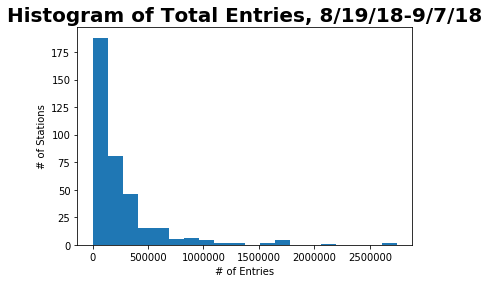

In [57]:
#Challenge #10
plt.hist(total_Ridership["DAILY_ENTRIES"],bins=20)
plt.title("Histogram of Total Entries, 8/19/18-9/7/18", family="Helvetica",weight="bold",fontsize=20)
plt.xlabel("# of Entries")
plt.ylabel("# of Stations")